# Práctica #9

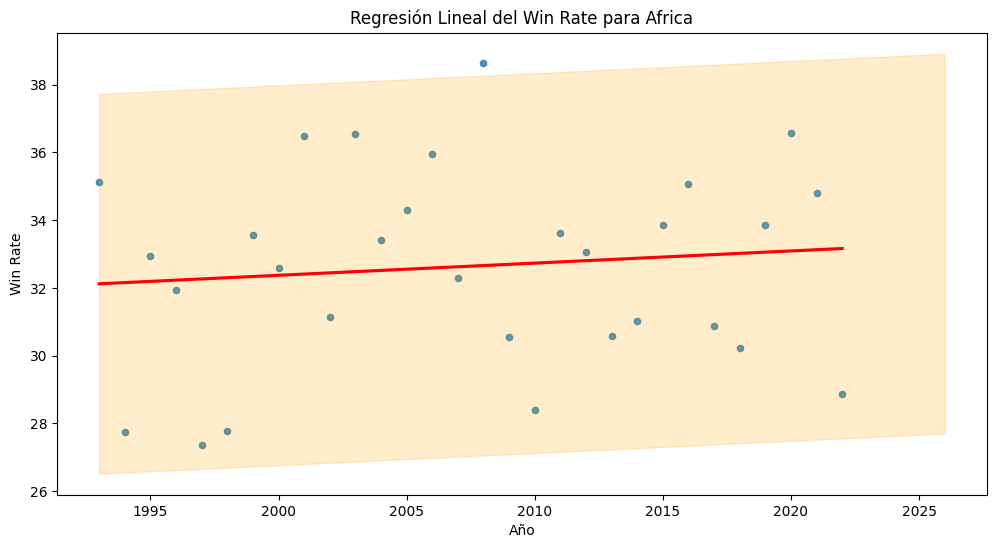

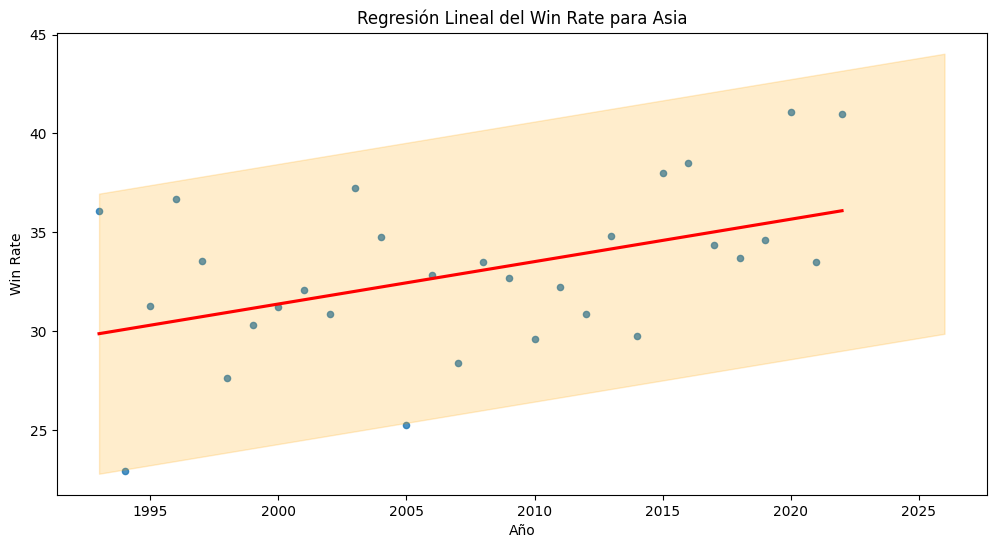

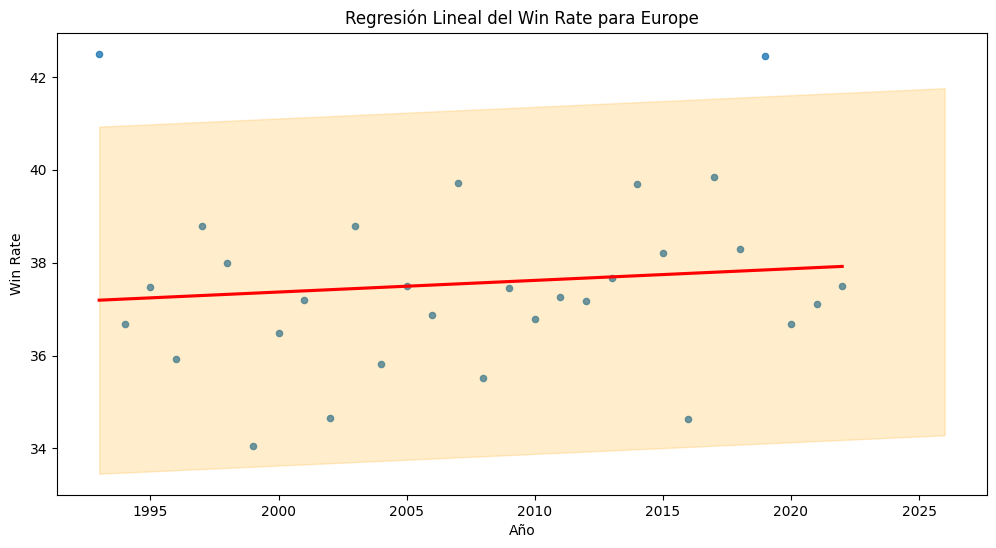

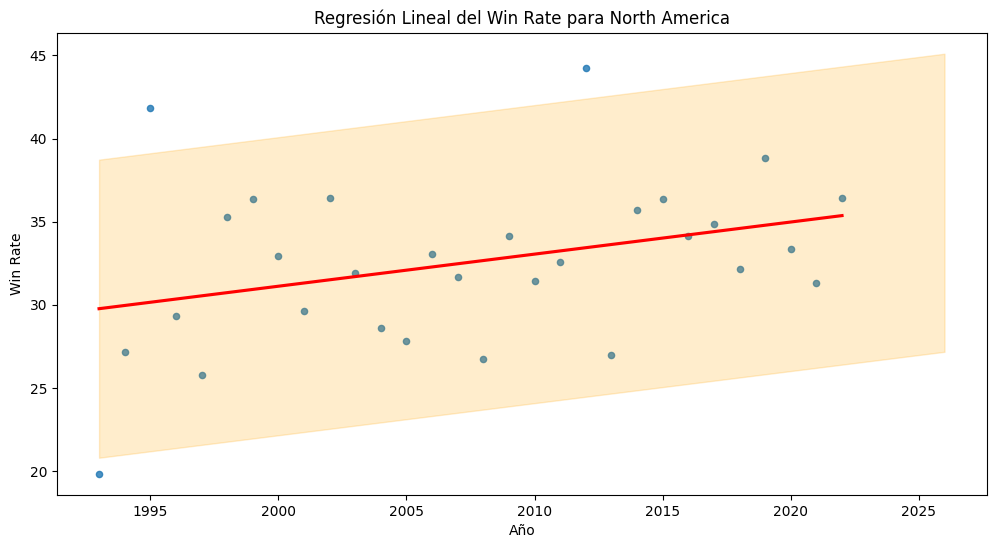

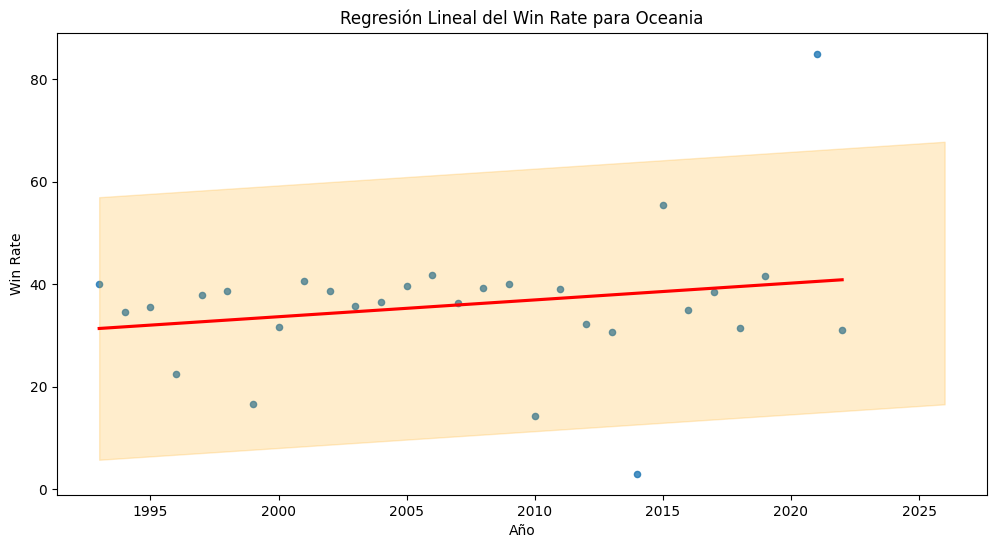

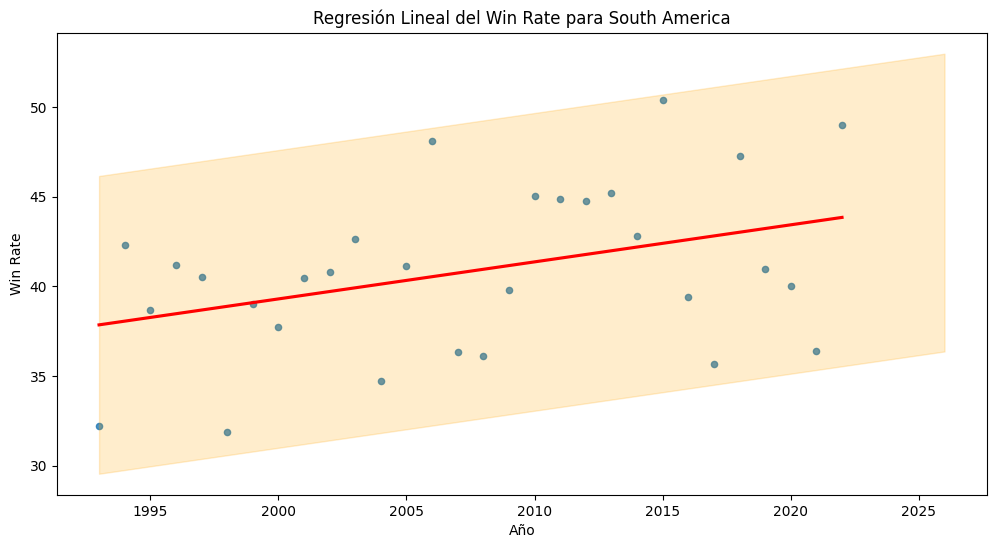

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../Analysis/team_stats_by_year.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df_by_continent = df.groupby(['Continent', 'Year'])['Win Rate'].mean().reset_index()

model = LinearRegression()
continents = df_by_continent['Continent'].unique()
for continent in continents:
    plt.figure(figsize=(12, 6))
    plt.title(f'Regresión Lineal del Win Rate para {continent}')
    continent_data = df_by_continent[df_by_continent['Continent'] == continent]
    continent_data['Year'] = continent_data['Year'].dt.year
    
    # Ajustar el modelo a los datos
    X = continent_data['Year'].values.reshape(-1, 1)
    y = continent_data['Win Rate'].values
    model.fit(X, y)
    
    # Predicciones con el modelo entrenado
    predictions = model.predict(X)
    
    # Línea de regresión
    sns.regplot(x='Year', y='Win Rate', data=continent_data, scatter_kws={'s': 20}, ci=None, line_kws={'color': 'red'})
    
    # Predicciones futuras e intervalo de confianza
    continent_data['Year'] = pd.to_datetime(continent_data['Year'], format='%Y')
    future_years = np.arange(continent_data['Year'].min().year, continent_data['Year'].max().year + 5).reshape(-1, 1)
    future_predictions = model.predict(future_years)
    confidence_interval = 1.96 * np.std(y - predictions)
    
    # Mostrar la franja de pronóstico
    plt.fill_between(future_years.flatten(), future_predictions - confidence_interval, future_predictions + confidence_interval, color='orange', alpha=0.2)
    plt.xlabel('Año')
    plt.ylabel('Win Rate')
    plt.show()